# 📖 Import Library 

In [35]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---

# 💻 Load in data

In [5]:
df=pd.read_csv('../datasets/poker_completed.csv')

In [6]:
# Check some data to make sure I load into the notebook

In [7]:
df.columns

Index(['game_id', 'hand_id', 'round', 'player_name', 'action', 'amount',
       'hole_cards', 'community_cards', 'pot', 'player_stack', 'small_blind',
       'big_blind', 'winner', 'card1', 'card2', 'card1_suit', 'card1_rank',
       'card2_suit', 'card2_rank', 'community1_rank', 'community1_suit',
       'community2_rank', 'community2_suit', 'community3_rank',
       'community3_suit', 'community4_rank', 'community4_suit',
       'community5_rank', 'community5_suit', 'poker_hand', 'bet_to_pot_ratio',
       'action_label', 'round_label'],
      dtype='object')

In [8]:
df.head()

,game_id,hand_id,round,player_name,action,amount,hole_cards,community_cards,pot,player_stack,...,community3_rank,community3_suit,community4_rank,community4_suit,community5_rank,community5_suit,poker_hand,bet_to_pot_ratio,action_label,round_label
0,a0fff211-95be-4c79-9382-2aafbd635955,1,preflop,Alice,fold,0,C6-DK,0,60,1000,...,0,0,0,0,0,0,1,0.000000,2,1
1,a0fff211-95be-4c79-9382-2aafbd635955,2,preflop,Alice,fold,0,S2-ST,0,30,1000,...,0,0,0,0,0,0,1,0.000000,2,1
2,a0fff211-95be-4c79-9382-2aafbd635955,3,preflop,Alice,call,30,DA-SK,0,90,970,...,0,0,0,0,0,0,1,0.333333,0,1
3,a0fff211-95be-4c79-9382-2aafbd635955,3,preflop,Alice,call,66,DA-SK,0,182,934,...,0,0,0,0,0,0,1,0.362637,0,1
4,a0fff211-95be-4c79-9382-2aafbd635955,3,flop,Alice,raise,36,DA-SK,HJ-C3-HA,218,898,...,14,3,0,0,0,0,2,0.165138,1,2


In [9]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8863 entries, 0 to 8862
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   game_id           8863 non-null   object 
 1   hand_id           8863 non-null   int64  
 2   round             8863 non-null   object 
 3   player_name       8863 non-null   object 
 4   action            8863 non-null   object 
 5   amount            8863 non-null   int64  
 6   hole_cards        8863 non-null   object 
 7   community_cards   8863 non-null   object 
 8   pot               8863 non-null   int64  
 9   player_stack      8863 non-null   int64  
 10  small_blind       8863 non-null   int64  
 11  big_blind         8863 non-null   int64  
 12  winner            8863 non-null   object 
 13  card1             8863 non-null   object 
 14  card2             8863 non-null   object 
 15  card1_suit        8863 non-null   int64  
 16  card1_rank        8863 non-null   int64  


---

# 🔍 EDA

### General information

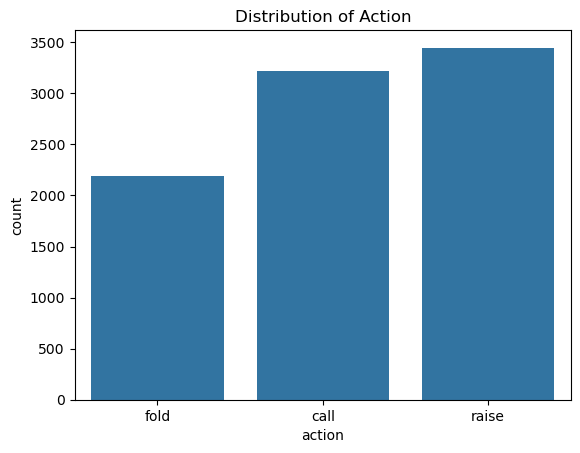

In [13]:
# Distribution of "Action"
sns.countplot(x="action", data=df)
plt.title('Distribution of Action')
plt.savefig('../images/Distribution_ofPlayerActions.png', format='png', dpi=300)
plt.show()

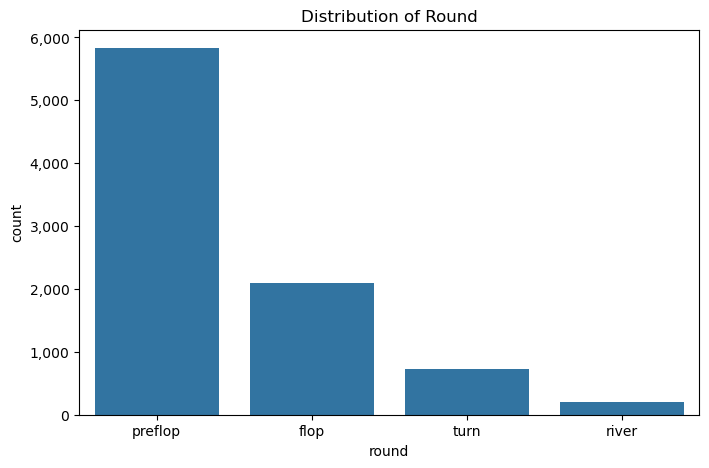

In [14]:
# Plotting the distribution of the 'round' column
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='round')
plt.title('Distribution of Round')

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}')) # Add comma for readability
plt.savefig('../images/Distribution_ofRound.png', format='png', dpi=300)
plt.show()

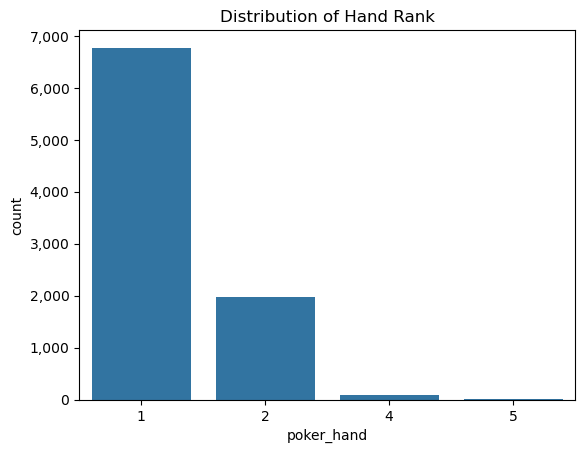

In [15]:
# Distribution of "Hand Rank"
sns.countplot(x="poker_hand", data=df)
plt.title('Distribution of Hand Rank')
plt.savefig('../images/Distribution_ofHands.png', format='png', dpi=300)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}')) # Add comma for readability
plt.show()

#### Note for Poker Hand Explanation
    1: Nothing in hand; not a recognized poker hand 
    2: One pair; one pair of equal ranks within five cards
    3: Two pairs; two pairs of equal ranks within five cards
    4: Three of a kind; three equal ranks within five cards
    5: Straight; five cards, sequentially ranked with no gaps
    6: Flush; five cards with the same suit
    7: Full house; pair + different rank three of a kind
    8: Four of a kind; four equal ranks within five cards
    9: Straight flush; straight + flush
    10: Royal flush; {Ace, King, Queen, Jack, Ten} + flush

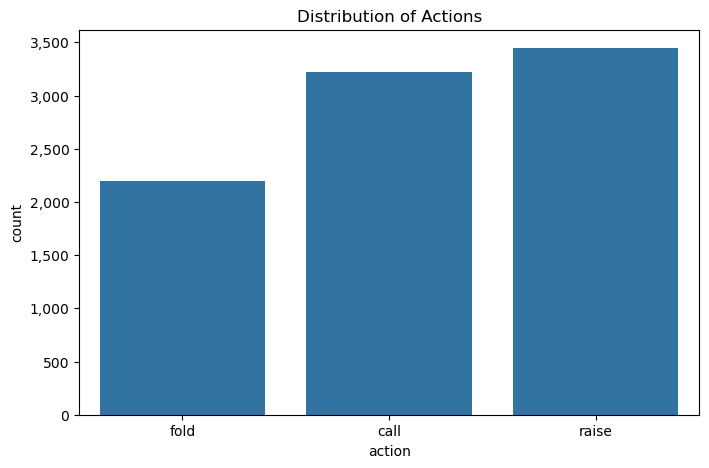

In [17]:
# Plotting the distribution of actions taken
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='action')
plt.title('Distribution of Actions')

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}')) # Add comma for readability
plt.savefig('../images/Distribution_ofAction.png', format='png', dpi=300)
plt.show()

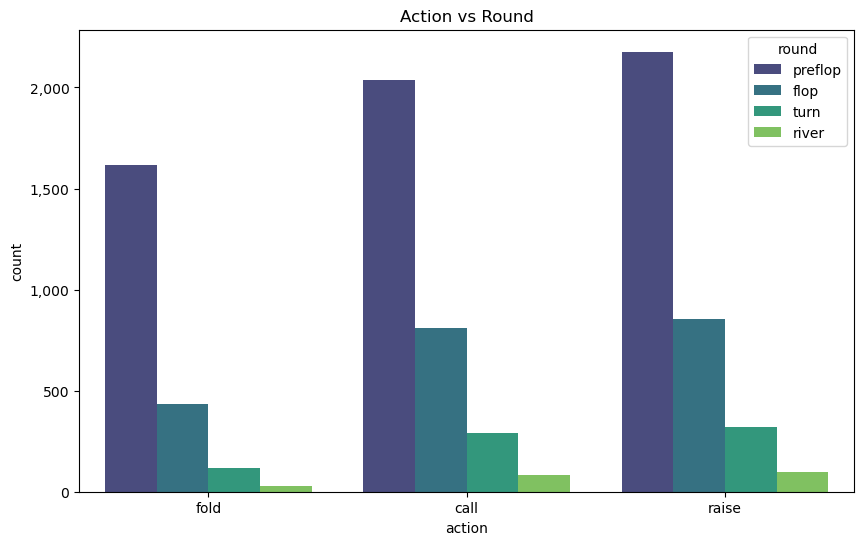

In [18]:
# Relationship between action and round 
# to check if some actions are specific to certain rounds like preflop, flop, etc.

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='action', hue='round',palette='viridis')
plt.title('Action vs Round')

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}')) # Add comma for readability
plt.savefig('../images/Action_vs_Round.png', format='png', dpi=300)
plt.show()

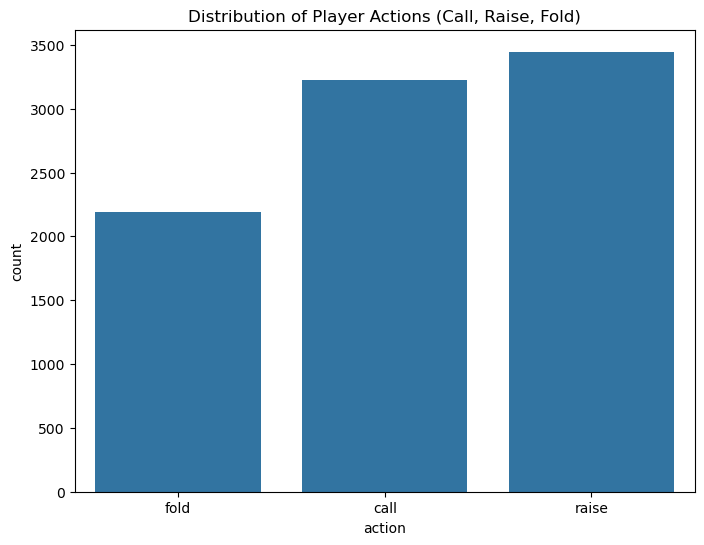

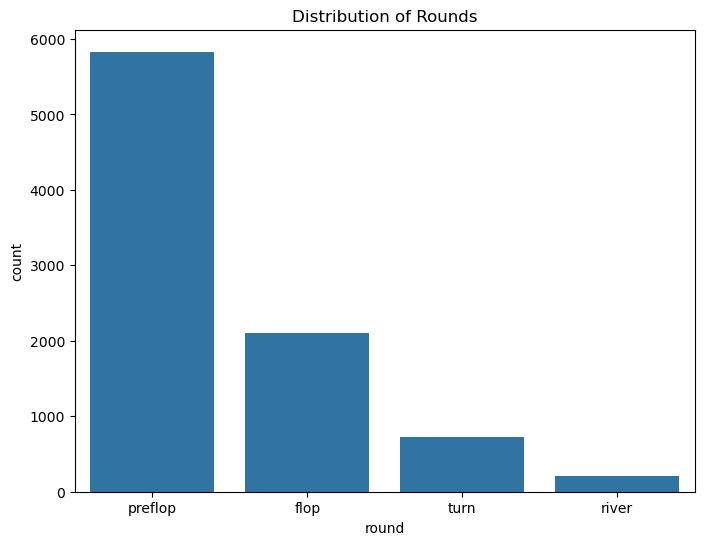

In [19]:
# Plot action distribution (Call, Raise, Fold)
plt.figure(figsize=(8, 6))
sns.countplot(x='action', data=df)
plt.title('Distribution of Player Actions (Call, Raise, Fold)')
plt.show()

# Plot round distribution (pre-flop, flop, turn, river)
plt.figure(figsize=(8, 6))
sns.countplot(x='round', data=df)
plt.title('Distribution of Rounds')
plt.show()

In [20]:
# I want to know how much each player gain the money
winnings = df.groupby(['game_id', 'player_name'])['amount'].sum().reset_index()
winners = winnings.loc[winnings.groupby('game_id')['amount'].idxmax()]
total_winnings = winners.groupby('player_name')['amount'].sum().sort_values(ascending=False)

total_winnings

player_name
Alice    194547
Bob      186155
Carol    176061
Dave     168802
Name: amount, dtype: int64

---